In [ ]:
!python --version

Python 3.7.3


## Image Manipulation Using scikit-image✍🏼

In [ ]:
pip install Pillow

     |████████████████████████████████| 2.1MB 3.5MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [ ]:
!pip install imageio

     |████████████████████████████████| 3.3MB 3.4MB/s eta 0:00:01


In [ ]:
import imageio

In [ ]:
img = imageio.imread('gatsby.jpg')

In [ ]:
img.shape

(373, 560, 3)

In [ ]:
imageio.imwrite('gatsby.jpg',img[:,:,0])

In [ ]:
pip install scikit-image

     |████████████████████████████████| 26.5MB 334kB/s eta 0:00:01
     |████████████████████████████████| 1.6MB 30.5MB/s eta 0:00:01
     |████████████████████████████████| 4.4MB 35.1MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


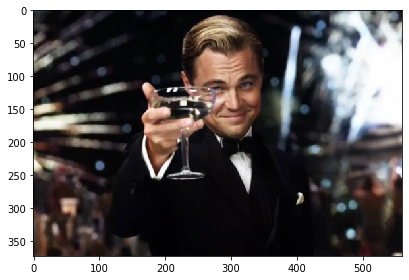

In [2]:
import PIL
from skimage import io
img = io.imread('gatsby.jpg' )
img.shape
io.imshow(img)

In [4]:
import matplotlib.pyplot as plt
from skimage.color import rgb2grey, rgb2hed, rgb2hsv, rgb2luv
grey_img = rgb2grey(img)
hed_img = rgb2hed(img)
hsv_img = rgb2hsv(img)
luv_img = rgb2luv(img)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


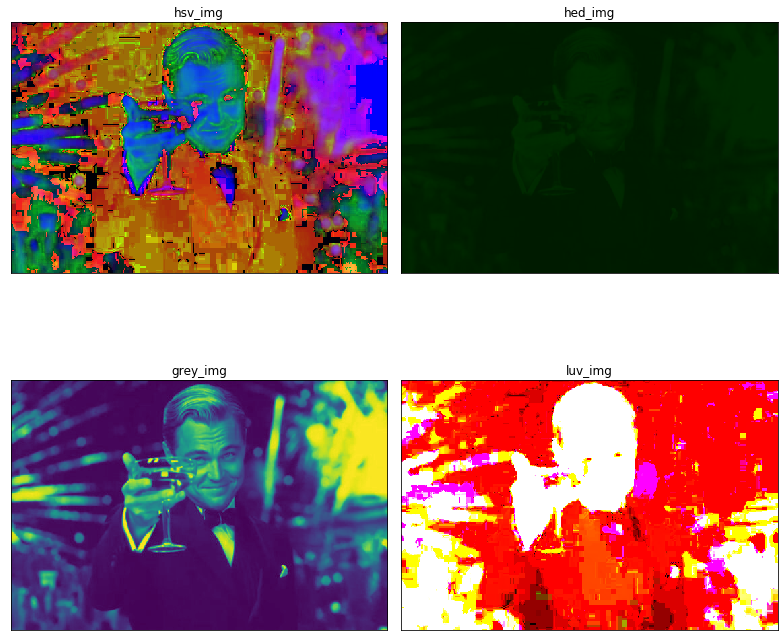

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(11, 11))
ax = axes.ravel()

ax[0].imshow(hsv_img)
ax[0].set_title('hsv_img')
ax[0].set_xticks([]),ax[0].set_yticks([])
ax[1].imshow(hed_img)
ax[1].set_title('hed_img')
ax[1].set_xticks([]),ax[1].set_yticks([])
ax[2].imshow(grey_img)
ax[2].set_title('grey_img')
ax[2].set_xticks([]),ax[2].set_yticks([])
ax[3].imshow(luv_img)
ax[3].set_title('luv_img')
ax[3].set_xticks([]),ax[3].set_yticks([])

fig.tight_layout()
plt.show()

## Adapting grayscale filters to Rgb

In [ ]:
from skimage.color.adapt_rgb import adapt_rgb, each_channel, hsv_value
from skimage import filters

In [ ]:
@adapt_rgb(each_channel)
def sobel_each(image):
    return filters.sobel(image)

@adapt_rgb(hsv_value)
def sobel_hsv(image):
    return filters.sobel(image)


Text(0.5, 1.0, 'Sobel filter computed\n on (V)alue converted image (HSV)')

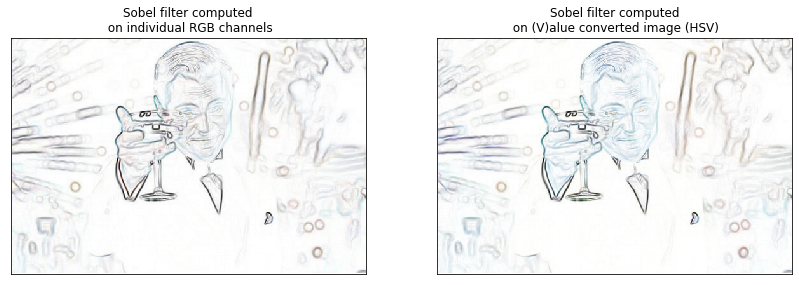

In [ ]:
from skimage.exposure import rescale_intensity
fig, (ax_each, ax_hsv) = plt.subplots(ncols=2, figsize=(14, 7))

# We use 1 - sobel_each(image) but this won't work if image is not normalized
ax_each.imshow(rescale_intensity(1 - sobel_each(img)))
ax_each.set_xticks([]), ax_each.set_yticks([])
ax_each.set_title("Sobel filter computed\n on individual RGB channels")

# We use 1 - sobel_hsv(image) but this won't work if image is not normalized
ax_hsv.imshow(rescale_intensity(1 - sobel_hsv(img)))
ax_hsv.set_xticks([]), ax_hsv.set_yticks([])
ax_hsv.set_title("Sobel filter computed\n on (V)alue converted image (HSV)")

In [ ]:
# create own handler
from skimage.color import rgb2gray, rgb2luv
def as_gray(image_filter, image, *args, **kwargs):
    gray_image = rgb2gray(image)
    return image_filter(gray_image, *args, **kwargs)

def as_luv(image_filter, image, *args, **kwargs):
    luv_image = rgb2luv(image)
    return image_filter(luv_image, *args, **kwargs)


In [ ]:
@adapt_rgb(as_gray)
def sobel_gray(image):
    return filters.sobel(image)

@adapt_rgb(as_luv)
def sobel_luv(image):
    return filters.sobel(image)

Text(0.5, 1.0, 'Sobel filter computed\n on converted gray scale img')

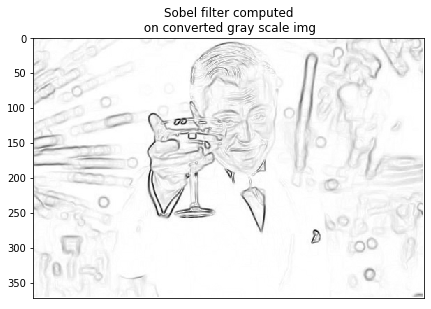

In [ ]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(7, 7))


# We use 1 - sobel_gray(image) but this won't work if image is not normalized
ax.imshow(rescale_intensity(1 - sobel_gray(img)), cmap=plt.cm.gray)
ax.set_xticks([]), ax_each.set_yticks([])
ax.set_title("Sobel filter computed\n on converted gray scale img")

ValueError: The parameter `image` must be a 2-dimensional array

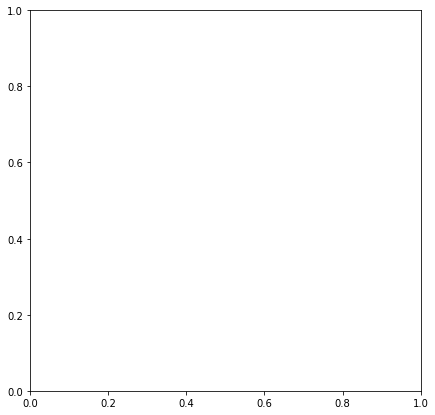

In [ ]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(7, 7))


# We use 1 - sobel_luv(image) but this won't work if image is not normalized
ax.imshow(rescale_intensity(1 - sobel_luv(img)))
ax.set_xticks([]), ax_each.set_yticks([])
ax.set_title("Sobel filter computed\n on converted luv channel img")

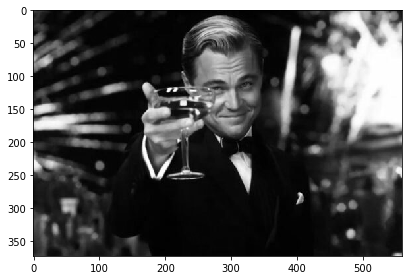

In [6]:
image = io.imread('gatsby.jpg', as_gray=True )
img.shape
io.imshow(image)


In [8]:
from skimage import img_as_float
from skimage import color
gray_image = img_as_float(image)

In [10]:
image = color.gray2rgb(gray_image)

In [12]:
image.shape

(373, 560, 3)

In [32]:
multiplier1 = [0.6, 0.2, 0.2]
multiplier2 = [0.1, 0.3, 0.3]


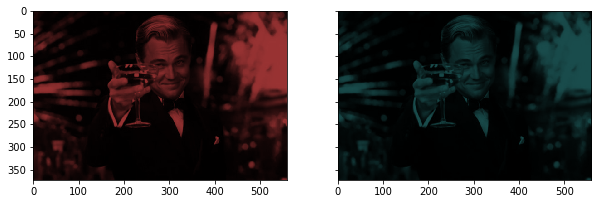

In [36]:

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 10),
                               sharex=True, sharey=True)
ax1.imshow(multiplier1 * image)
ax2.imshow(multiplier2 * image)

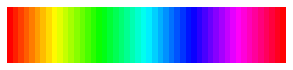

In [38]:
import numpy as np

hue_gradient = np.linspace(0, 1)
hsv = np.ones(shape=(1, len(hue_gradient), 3), dtype=float)
hsv[:, :, 0] = hue_gradient

all_hues = color.hsv2rgb(hsv)

fig, ax = plt.subplots(figsize=(5, 2))
# Set image extent so hues go from 0 to 1 and the image is a nice aspect ratio.
ax.imshow(all_hues, extent=(0, 1, 0, 0.2))
ax.set_axis_off()

## Sharpening the images⚡️⚡️

In [57]:
from skimage.filters import unsharp_mask

result_1 = unsharp_mask(img, radius=1.5, amount=1)
result_2 = unsharp_mask(img, radius=5, amount=2)
result_3 = unsharp_mask(img, radius=20, amount=1)


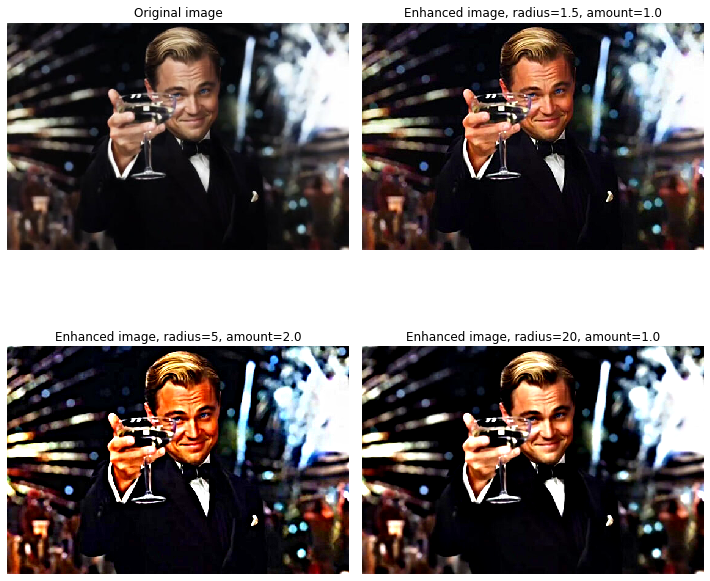

In [59]:
fig, axes = plt.subplots(nrows=2, ncols=2,
                         sharex=True, sharey=True, figsize=(10, 10))
ax = axes.ravel()

ax[0].imshow(img, cmap=plt.cm.gray)
ax[0].set_title('Original image')
ax[1].imshow(result_1, cmap=plt.cm.gray)
ax[1].set_title('Enhanced image, radius=1.5, amount=1.0')
ax[2].imshow(result_2, cmap=plt.cm.gray)
ax[2].set_title('Enhanced image, radius=5, amount=2.0')
ax[3].imshow(result_3, cmap=plt.cm.gray)
ax[3].set_title('Enhanced image, radius=20, amount=1.0')

for a in ax:
    a.axis('off')
fig.tight_layout()
plt.show()

## Background removal ✂️

In [69]:
from skimage.exposure import histogram

hist, hist_centers = histogram(gray_image)

In [117]:
from skimage.feature import canny
edges = canny(gray_image/1.)

In [187]:
from skimage import filters
sobel = filters.sobel(gray_image)

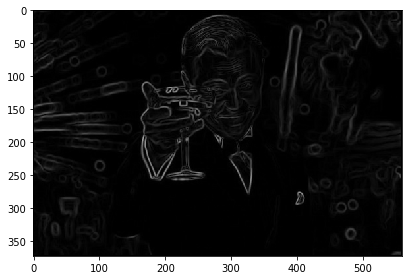

In [191]:
io.imshow(sobel)

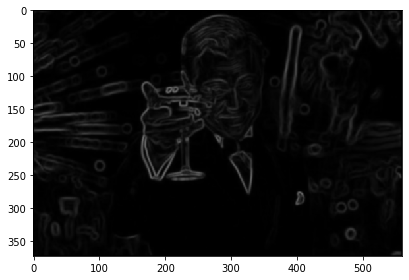

In [217]:
blurred = filters.gaussian(sobel)
io.imshow(blurred)